In [123]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import overlap_try as overlap
from nest import detectors   
from astropy.cosmology import Planck15
from nest import pls_try as pls
import matplotlib.cm as cm

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* LIGO

In [121]:
f = np.logspace(1, np.log10(2000), 1000)
beta_min = -8
beta_max = 8
fref = 25
snr = 1
Tobs = 1

pls_LIGO_t = pls.find_pls('LIGO H', 'LIGO L', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
pls_LIGO_v = pls.find_pls('LIGO H', 'LIGO L', f, 'v', beta_min, beta_max, fref, snr, Tobs, None)
pls_LIGO_s = pls.find_pls('LIGO H', 'LIGO L', f, 's', beta_min, beta_max, fref, snr, Tobs, None)



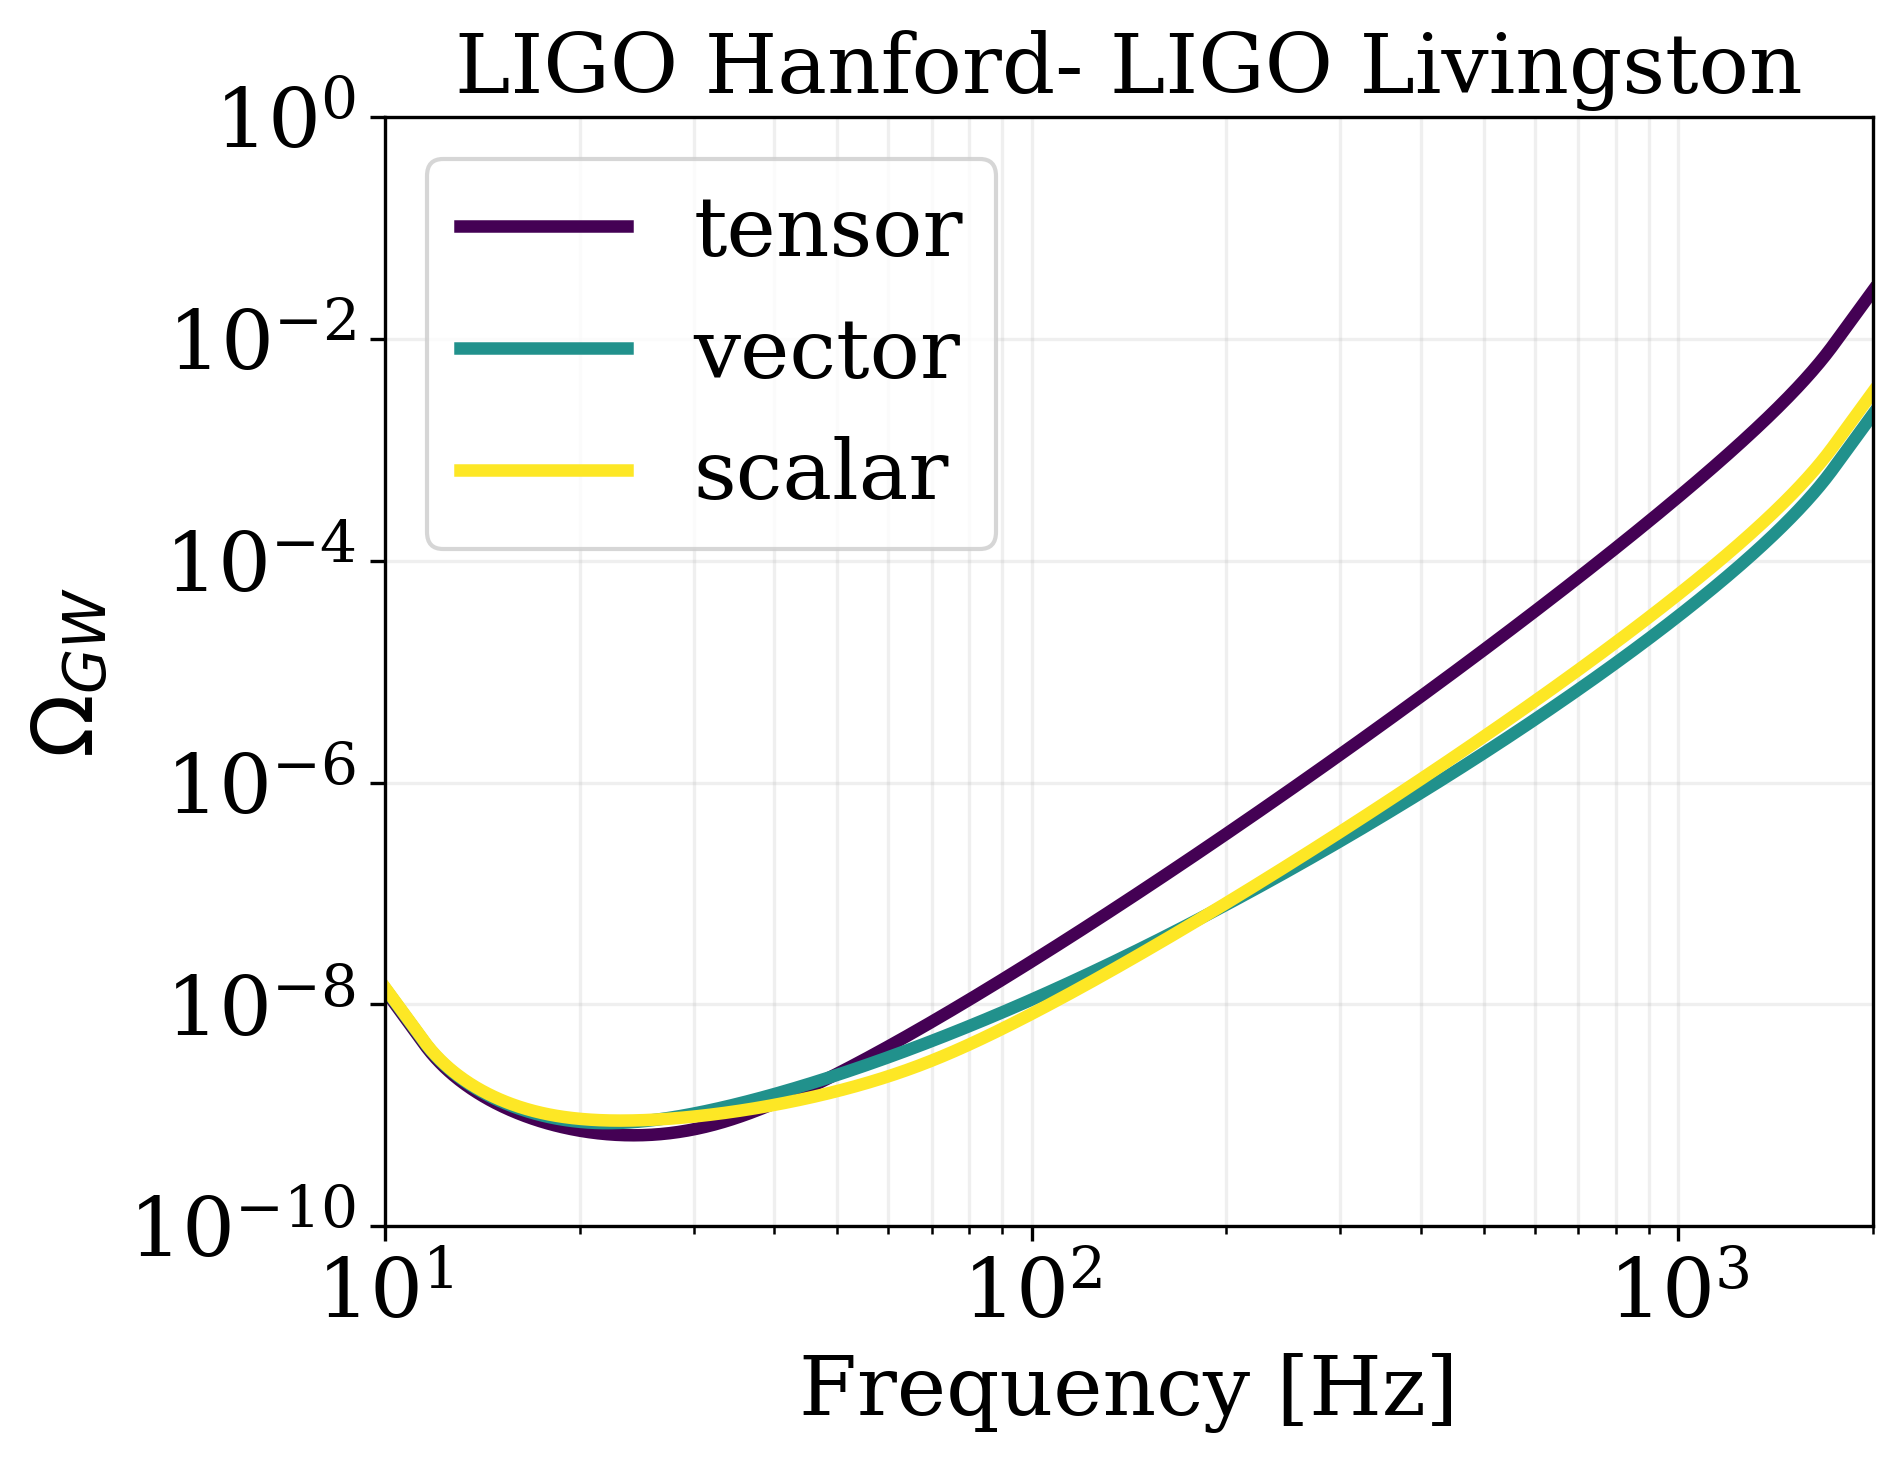

In [124]:
colors = cm.viridis(np.linspace(0, 1, 3))

plt.loglog(f, pls_LIGO_t, label='tensor', color=colors[0])
plt.loglog(f, pls_LIGO_v, label='vector', color=colors[1])
plt.loglog(f, pls_LIGO_s, label='scalar', color=colors[2])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.xlim(10, 2000)
plt.ylim(1e-10, 1e0)
plt.title('LIGO Hanford- LIGO Livingston')
plt.show()

* ET $\Delta$

In [127]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -40
beta_max = 40
fref = 25
snr = 1
Tobs = 1

pls_weighted_ET_triang = pls.find_pls_weighted('ET A', 'ET B', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_T_10km_HFLFcryo.txt', unpack=True)


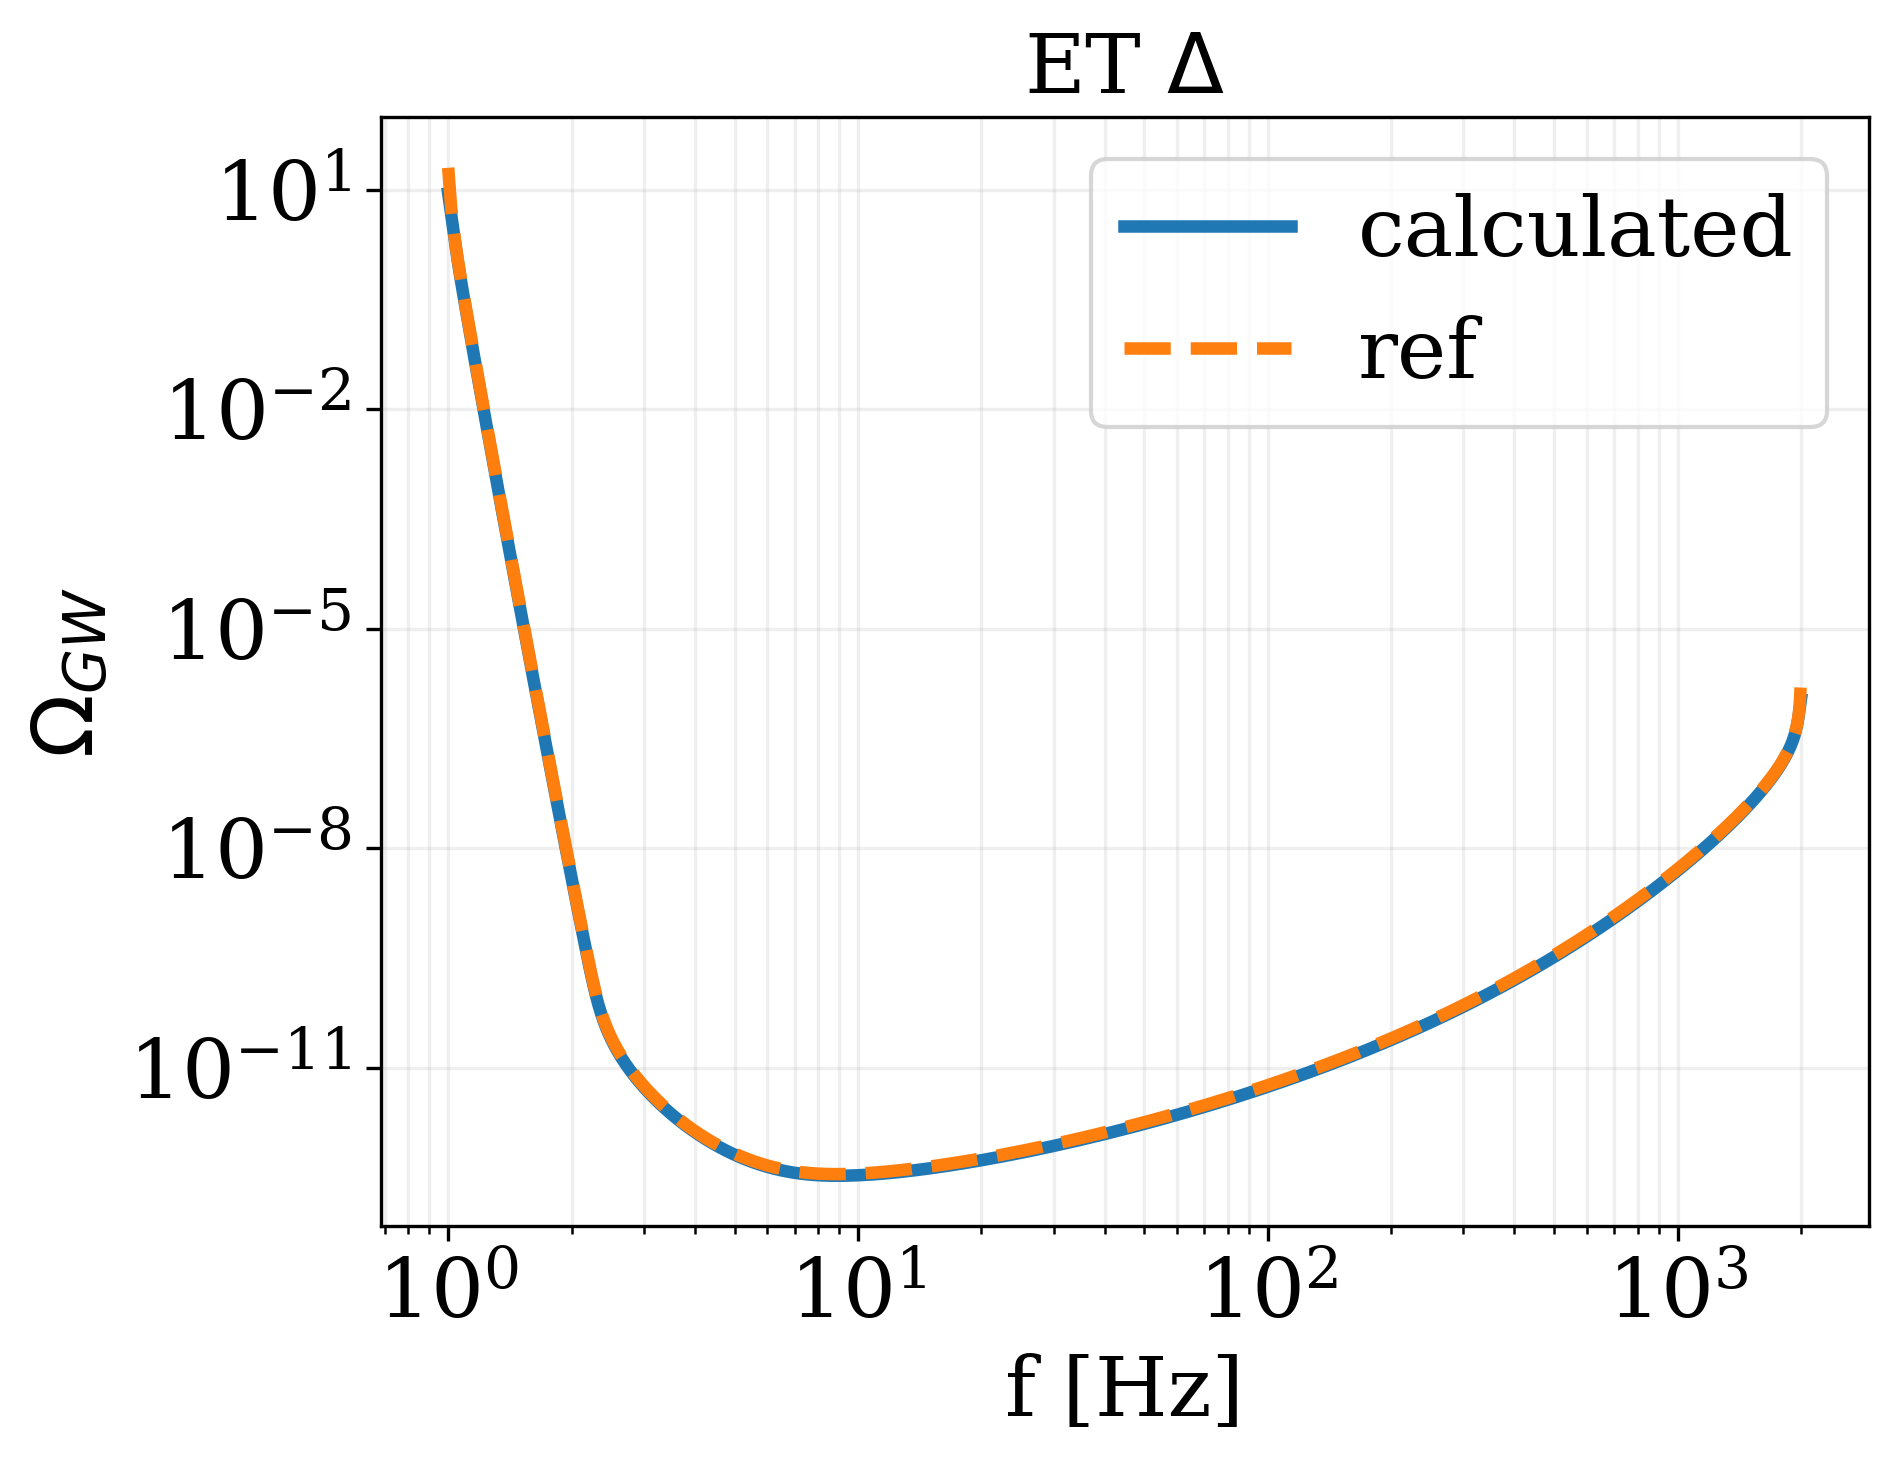

In [130]:
plt.loglog(f, pls_weighted_ET_triang, label='calculated')
plt.loglog(f_ref, PLS_ref, label='ref', linestyle = '--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.title(r'ET $\Delta$')
plt.show()


In [134]:
f = np.logspace(0, 5, 1000)
pls_weighted_ET_triang_t = pls.find_pls_weighted('ET A', 'ET B', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
pls_weighted_ET_triang_v = pls.find_pls_weighted('ET A', 'ET B', f, 'v', beta_min, beta_max, fref, snr, Tobs, None)
pls_weighted_ET_triang_s = pls.find_pls_weighted('ET A', 'ET B', f, 's', beta_min, beta_max, fref, snr, Tobs, None)


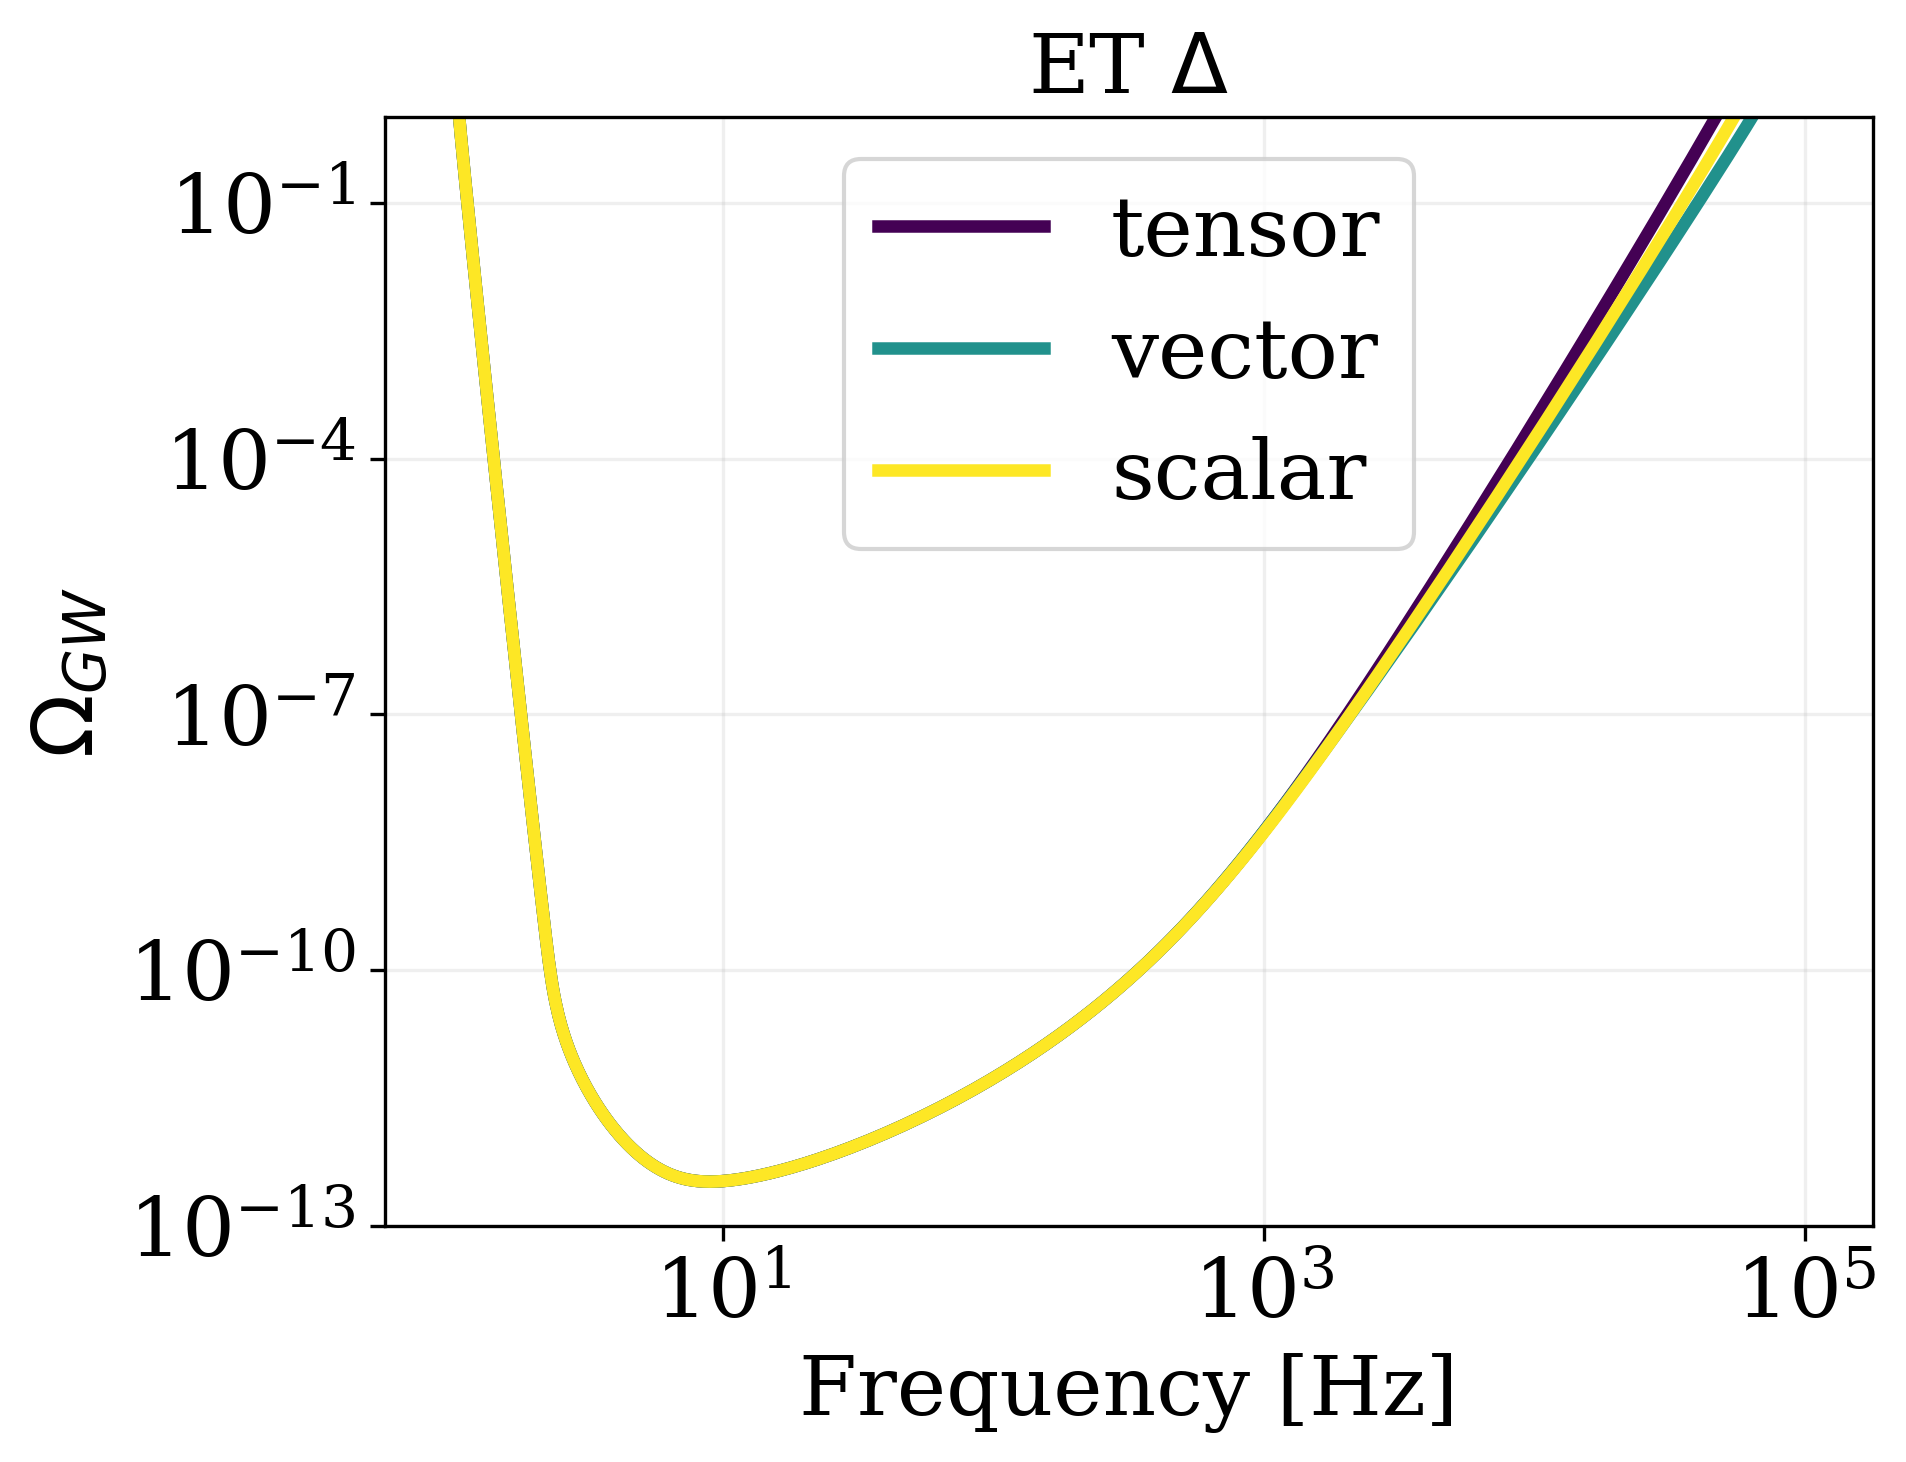

In [136]:
colors = cm.viridis(np.linspace(0, 1, 3))

plt.loglog(f, pls_weighted_ET_triang_t, label='tensor', color=colors[0])
plt.loglog(f, pls_weighted_ET_triang_v, label='vector', color=colors[1])
plt.loglog(f, pls_weighted_ET_triang_s, label='scalar', color=colors[2])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
#plt.xlim(1, 2000)
plt.ylim(1e-13, 1e0)
plt.title(r'ET $\Delta$')
plt.show()

* ET 2L $\alpha = 0^{\circ}$

In [104]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -80
beta_max = 80
fref = 25
snr = 1
Tobs = 1
pls_ET = pls.find_pls_t('ET L1', 'ET L2', f, beta_min, beta_max, fref, snr, Tobs, np.deg2rad(0))

f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)

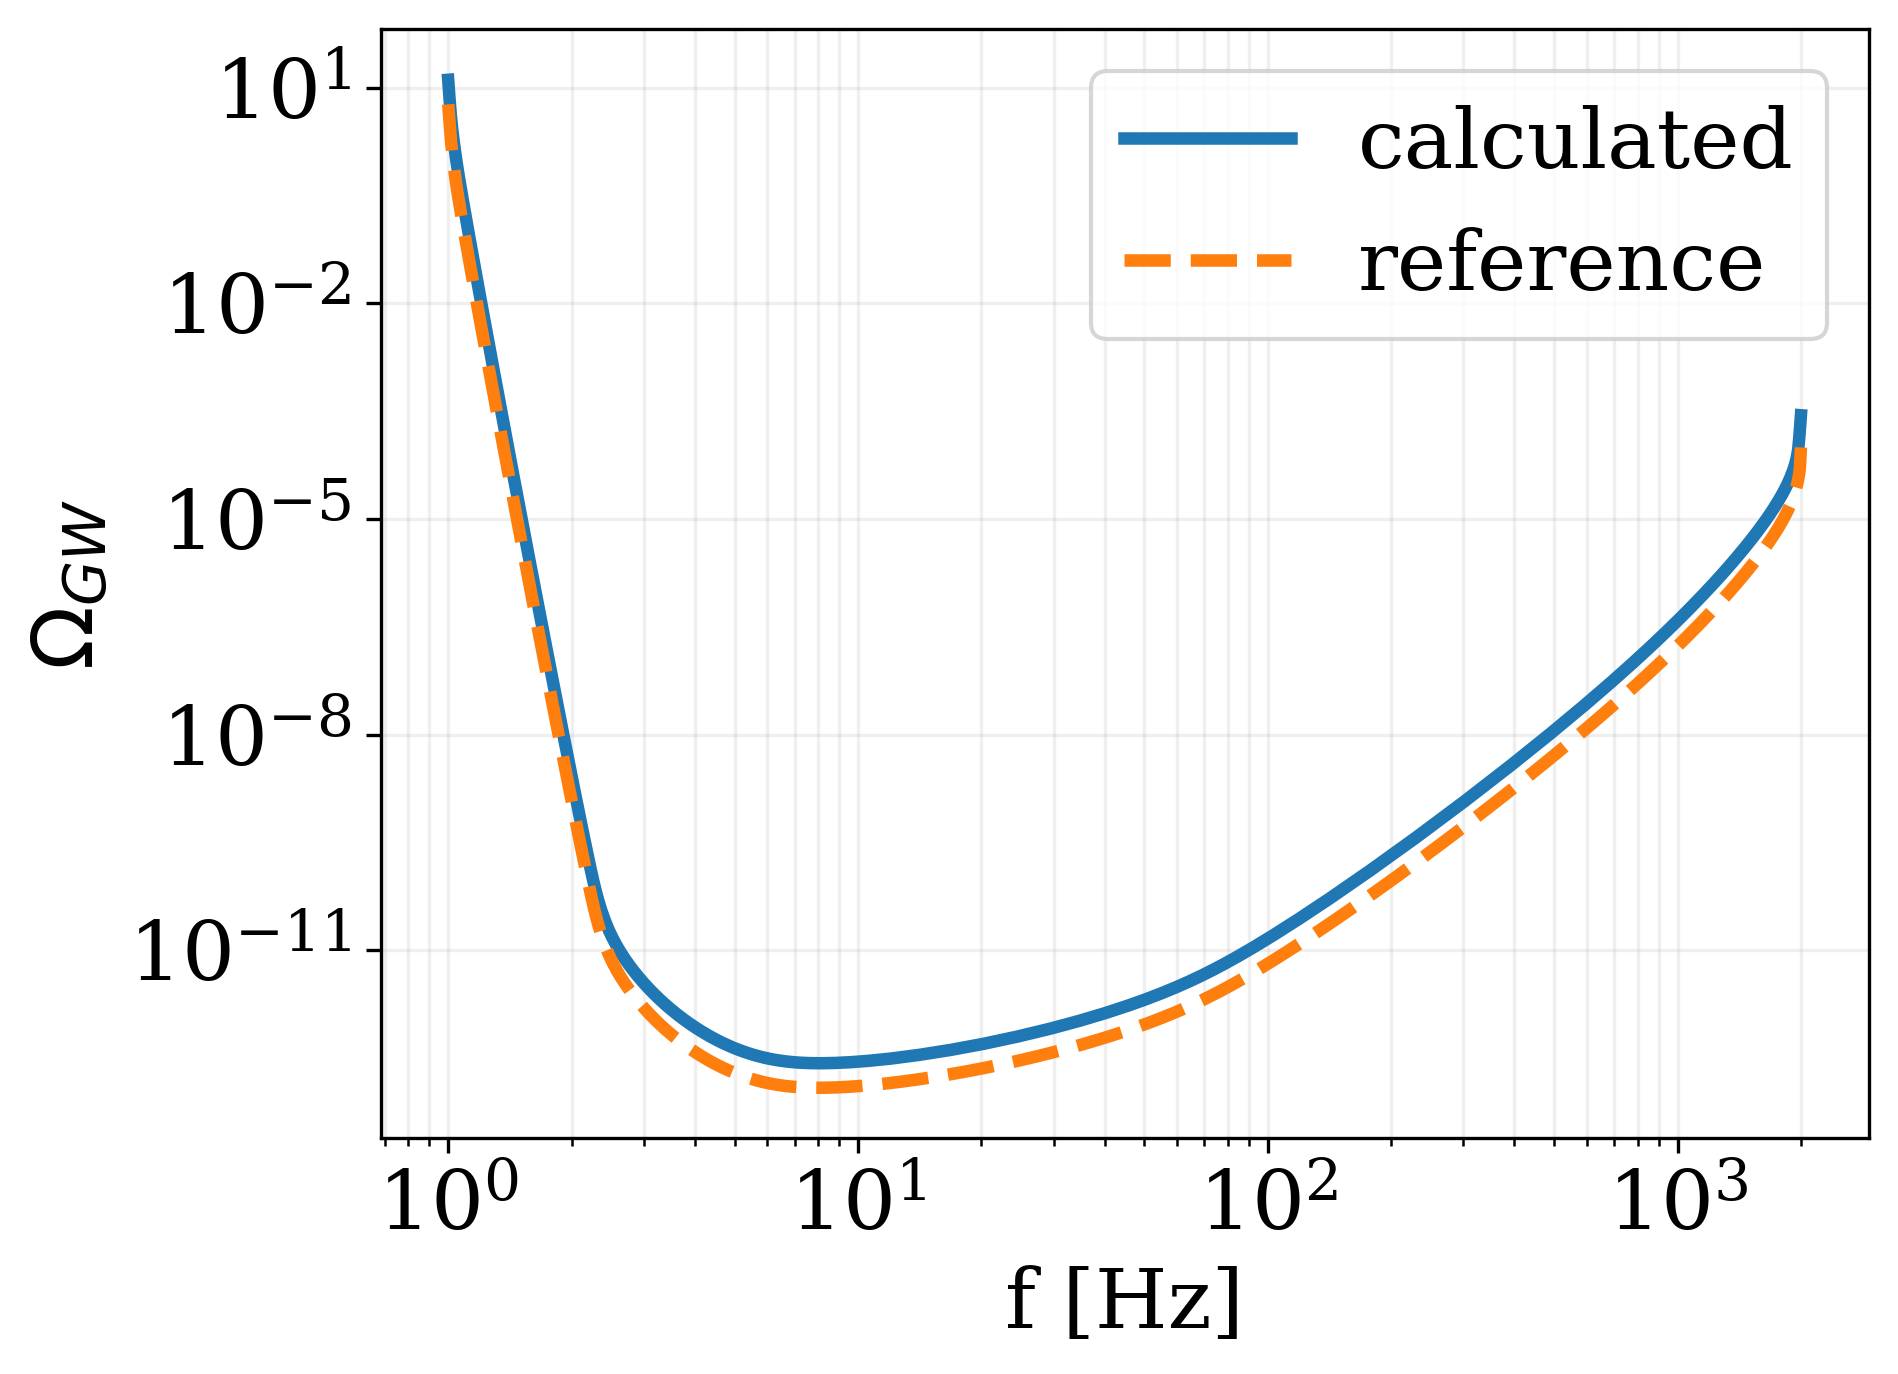

In [105]:
plt.plot(f, pls_ET, label='calculated')
plt.plot(f_ref, PLS_ref, label='reference', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.show()

* ET 2L $\alpha= 47.5^{\circ}$

In [110]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -40
beta_max = 40
fref = 25
snr = 1
Tobs = 1

pls_ET = pls.find_pls_t('ET L1', 'ET L2', f, beta_min, beta_max, fref, snr, Tobs, np.deg2rad(42.5))
f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L45deg_15km_HFLFcryo.txt', unpack=True)



<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/var/folders/5d/ymf225n1541cfw2gc3hlv41w0000gn/T/ipykernel_24681/2601820336.py:1: SyntaxWarning: invalid escape sequence '\c'
  plt.loglog(f, pls_ET, label='ET 2L $42.5^{\circ}$')


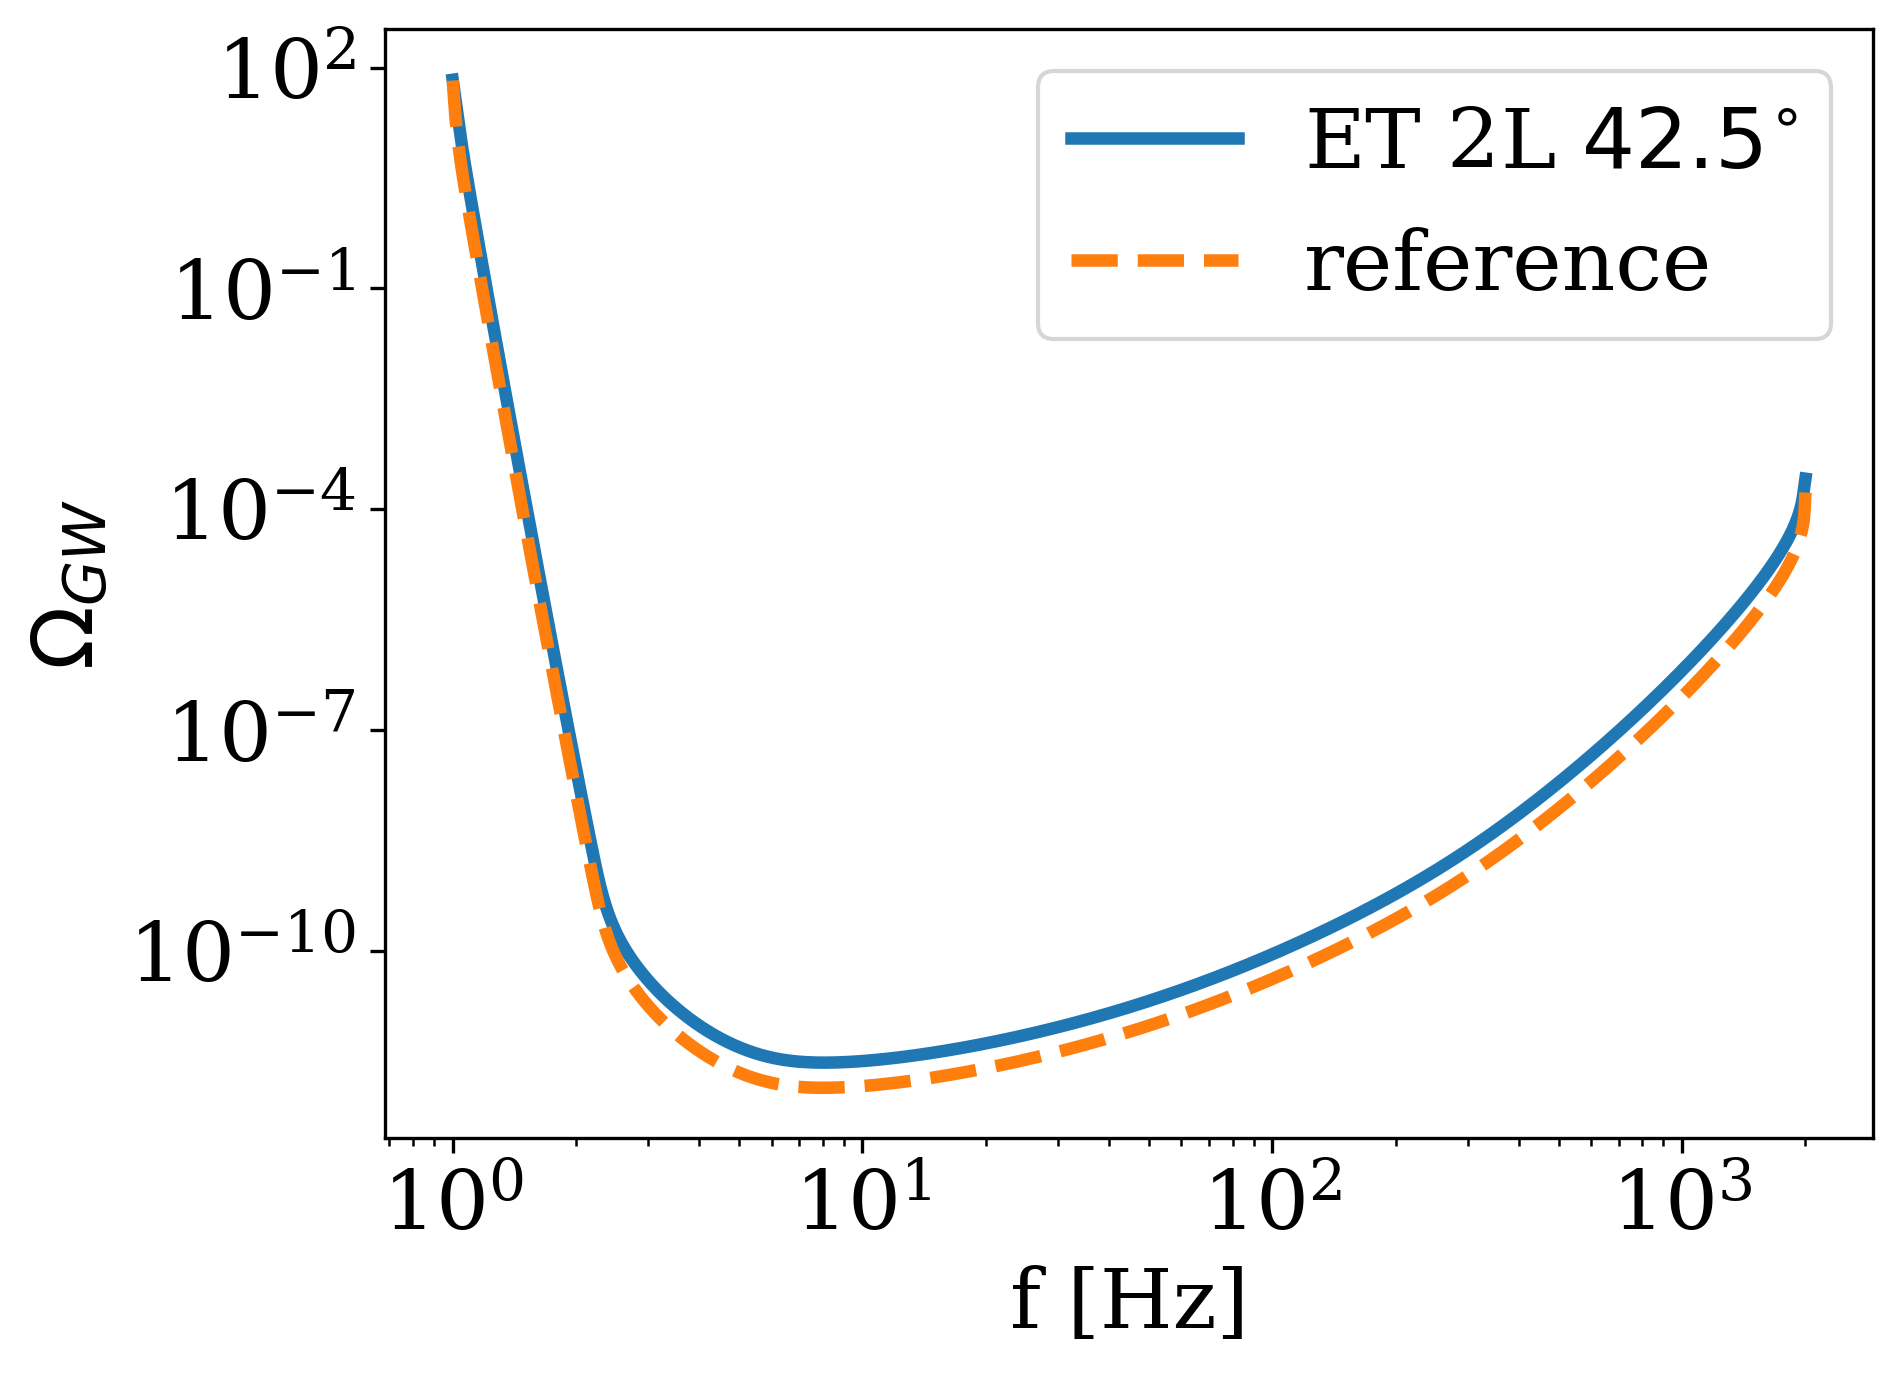

In [111]:
plt.loglog(f, pls_ET, label='ET 2L $42.5^{\circ}$')
plt.loglog(f_ref, PLS_ref, label='reference', linestyle ='--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.show()

* LISA

In [192]:
f = np.logspace(-5, 0, 1000)
beta_min = -40
beta_max = 40
fref = 1e-3
snr = 10
Tobs = 3

pls_LISA = pls.find_pls('LISA 1', 'LISA 1', f, 't', beta_min, beta_max, fref, snr, Tobs, None)

#np.savetxt('LISA_pls.txt', np.column_stack((f, pls_LISA)), header='f pls_LISA', comments='')

f_ref, PLS_ref1, PLS_ref2, PLS_ref3 = np.loadtxt('LISA_sens.txt', unpack=True, usecols=(0, 1, 2, 3))

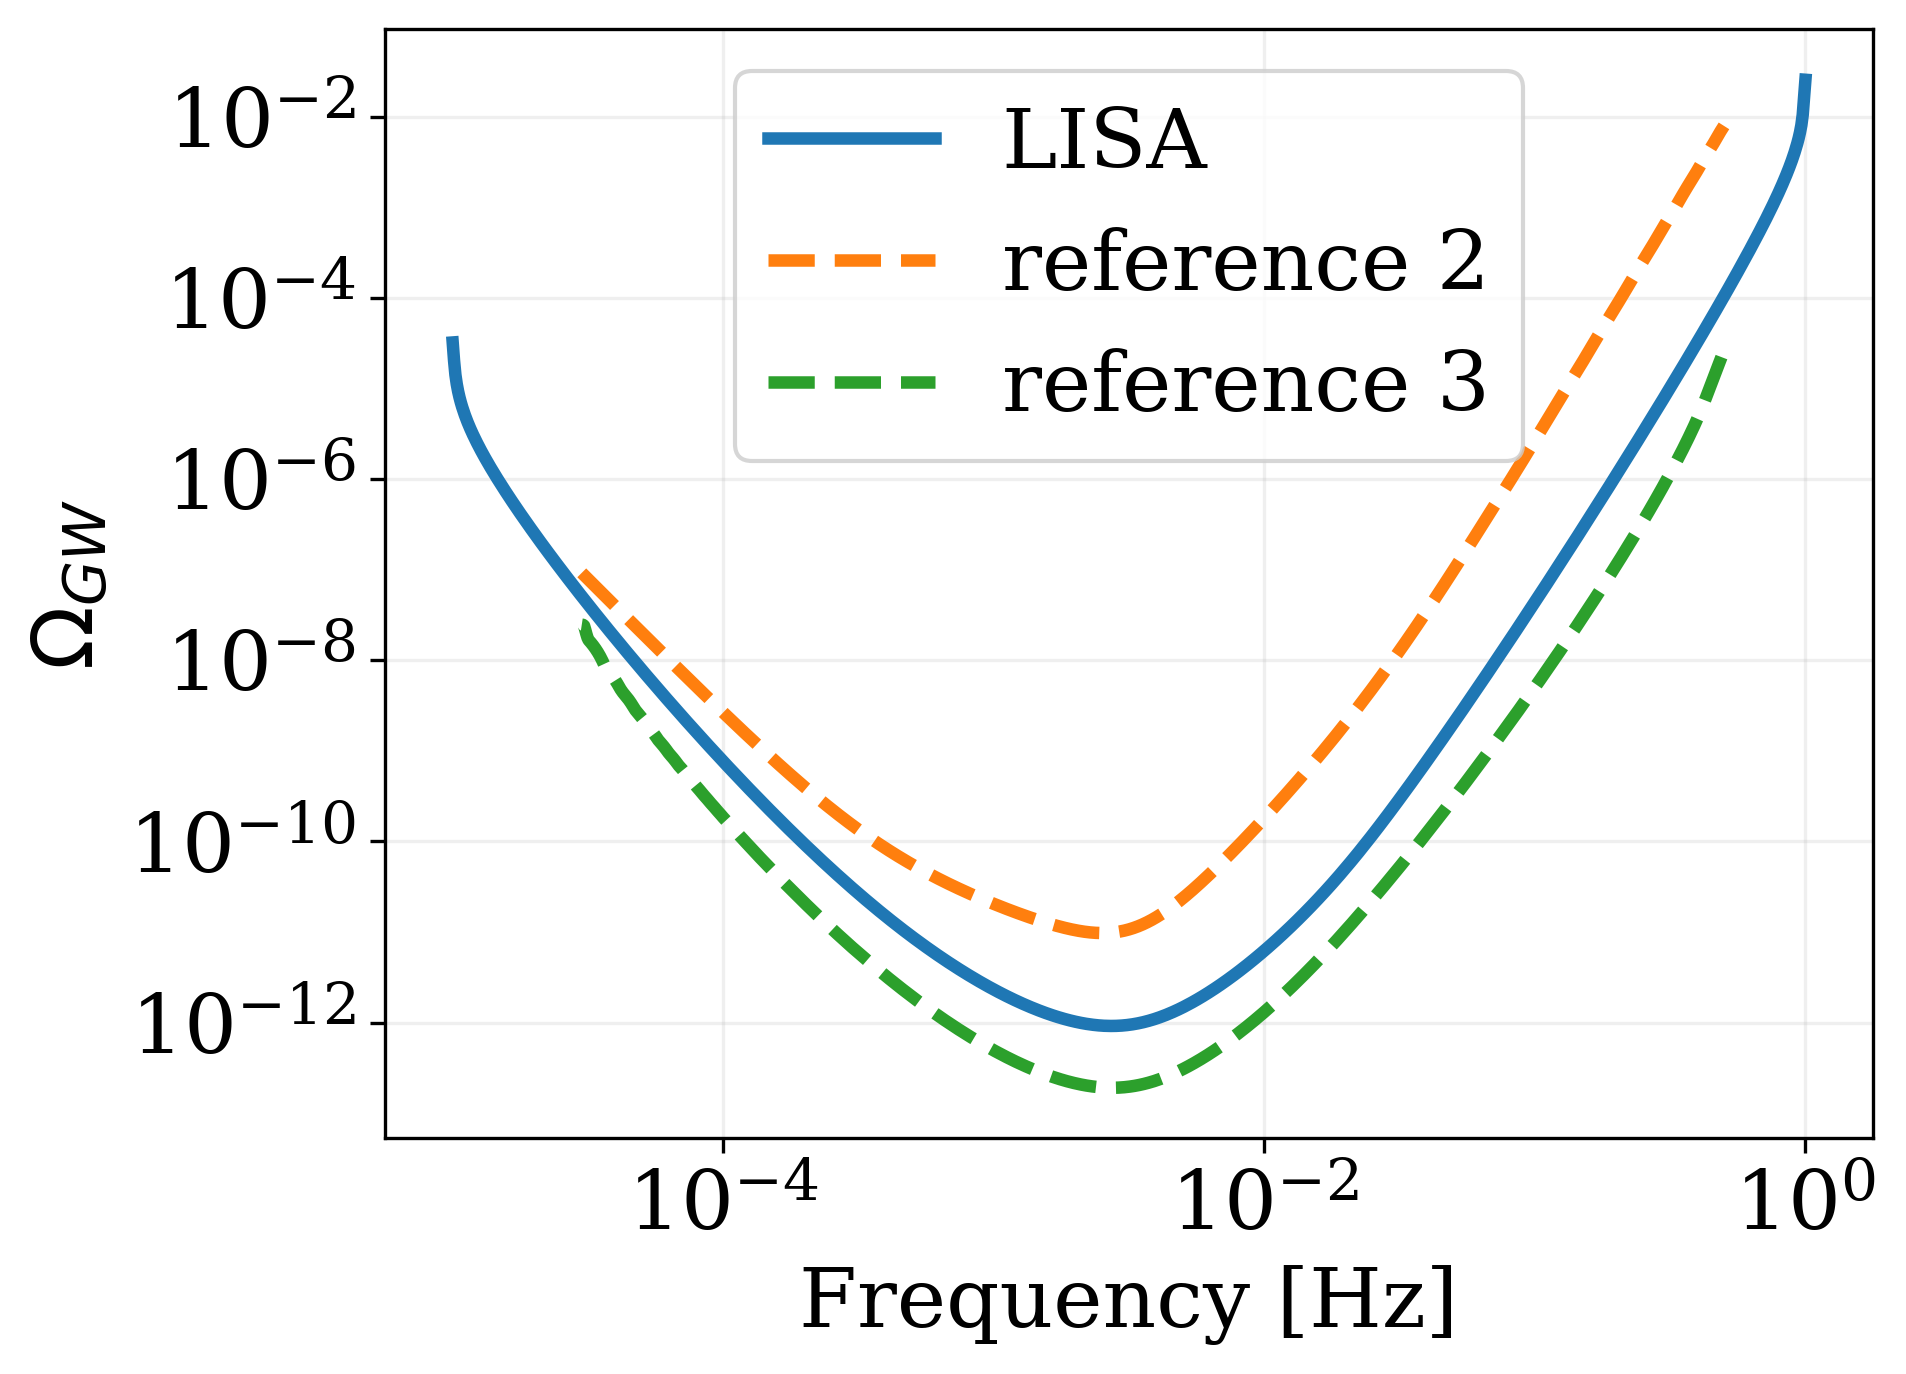

In [196]:
plt.loglog(f, pls_LISA, label='LISA')
#plt.loglog(f_ref, PLS_ref1, label='reference 1', linestyle='--')
plt.loglog(f_ref, PLS_ref2, label='reference 2', linestyle='--')
plt.loglog(f_ref, PLS_ref3, label='reference 3', linestyle='--')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()
plt.grid(alpha =0.2, which='both')  
# plt.ylim(1e-13, 1e-4)
# plt.xlim(2e-5, 0.5)
plt.show()